In [ ]:
import pandas as pd
import scipy.interpolate as interp
import h5py
from tqdm import tqdm
import pandas as pd
import numpy as np
import itertools as it
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Computer Modern Roman"]})

from meta_feature import dataset_ids_CC18, anchor_list_denser, feature_num_CC18, class_num_CC18, learner_zoo

In [2]:
with h5py.File(Path.cwd() / '../dataset/LCDB11_ER_CC18_24.hdf5', 'r') as f:
    dataset_CC18 = f['error rate'][...]
dataset_nofs, dataset_minmaxfs, dataset_standardfs = dataset_CC18[..., 0, 0], dataset_CC18[..., 1, 0], dataset_CC18[..., 2, 0]

### shapes of learning curves

learner: 21, dataset: 71


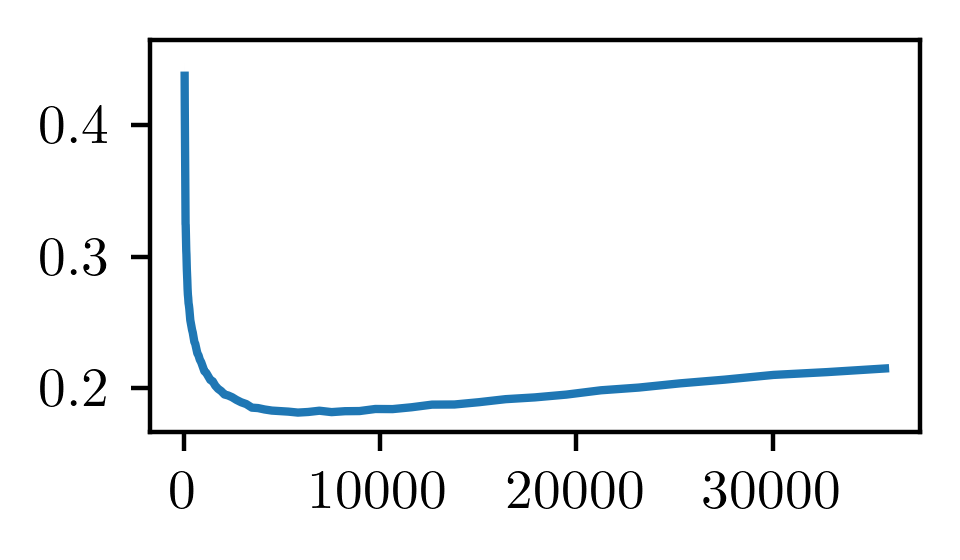

In [45]:
# transition
# LEARNER, DATASET = 11, 48
LEARNER, DATASET = 13, 61
LEARNER, DATASET = 11, 31
# peaking
LEARNER, DATASET = 12, 58
# dipping
LEARNER, DATASET = 3, 42
LEARNER, DATASET = 21, 71

print(f"learner: {LEARNER}, dataset: {DATASET}")
lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

plt.figure(figsize=(2.5, 1.5), dpi=400)
plt.plot(anchor_list_denser, mean_clean, label = "LCDB 1.1")
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)
# plt.title(f'{learner_zoo[LEARNER]}, \n OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=16)
# plt.xlabel('Training Set Size', fontsize=16)
# plt.ylabel('Error Rate', fontsize=16)
# plt.xscale('log')
# plt.xticks([])  
# plt.yticks([])  
plt.tight_layout()
plt.show()

### denser anchor

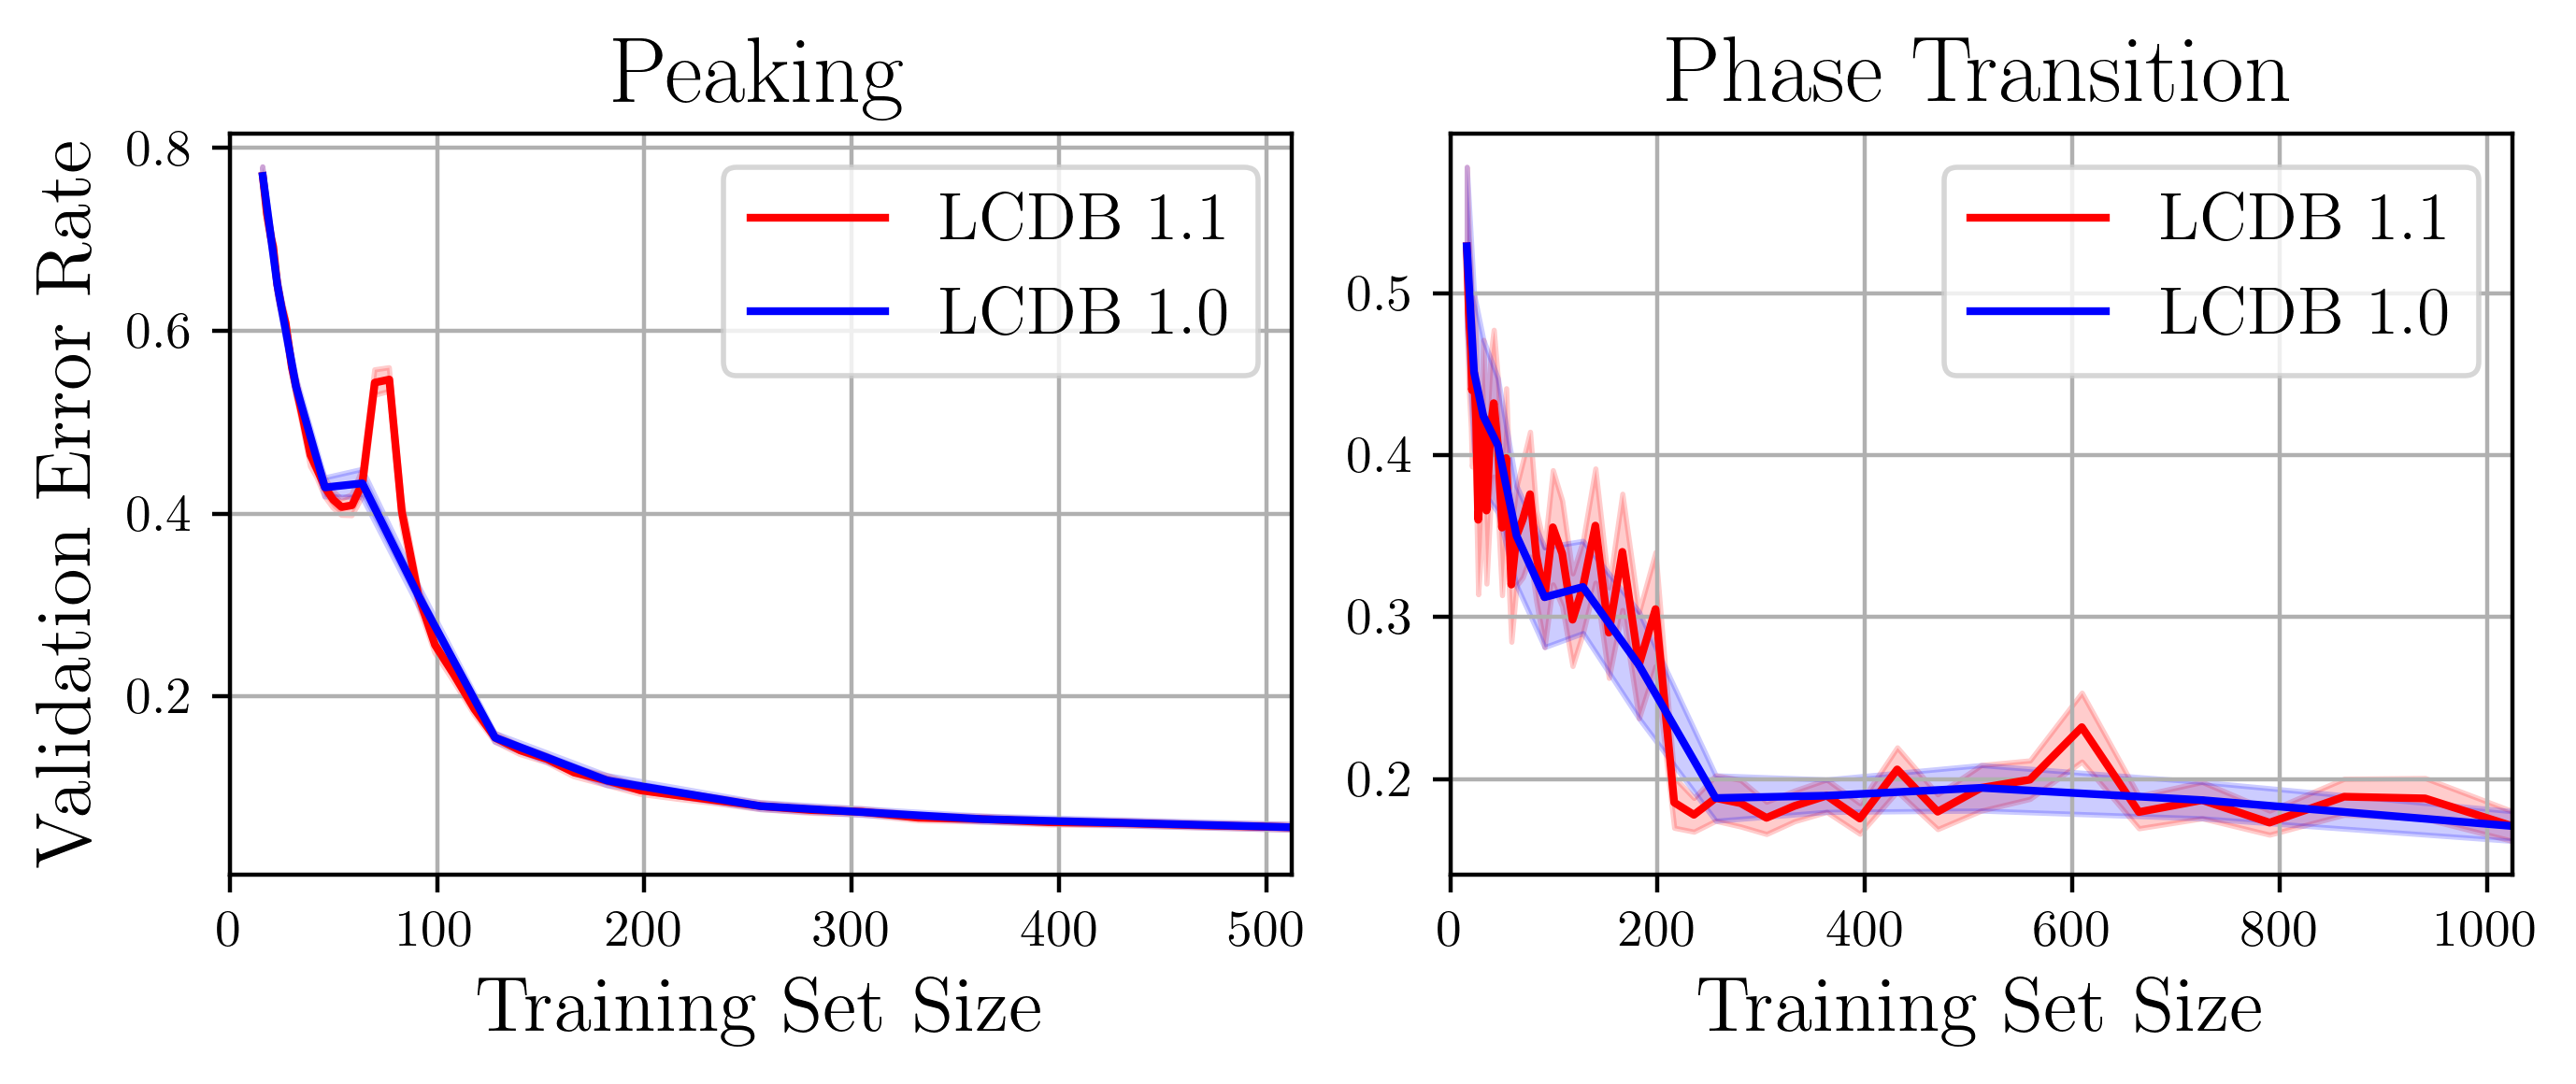

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), dpi=400)

LEARNER, DATASET = 12, 6
lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean, axis=(0, 1))
se_clean = np.nanstd(lc_clean, axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean), axis=(0, 1)))

axs[0].plot(anchor_list_denser, mean_clean, color='red', label="LCDB 1.1")
axs[0].fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, color='red', alpha=0.2)

axs[0].plot(anchor_list_denser[::4], mean_clean[::4], color='blue', label="LCDB 1.0")
axs[0].fill_between(anchor_list_denser[::4], mean_clean[::4] - se_clean[::4], mean_clean[::4] + se_clean[::4], color='blue', alpha=0.2)

axs[0].set_title('Peaking', fontsize=18)
axs[0].set_xlabel('Training Set Size', fontsize=15)
axs[0].set_ylabel('Validation Error Rate', fontsize=15)
# axs[0].set_xlim(right=anchor_list_denser[::4][np.count_nonzero(~np.isnan(mean_clean[::4])) - 1])
axs[0].set_xlim(0, 512)
axs[0].legend(fontsize=13)
axs[0].grid()


LEARNER, DATASET = 11, 32
lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean, axis=(0, 1))
se_clean = np.nanstd(lc_clean, axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean), axis=(0, 1)))

axs[1].plot(anchor_list_denser, mean_clean, color='red', label="LCDB 1.1")
axs[1].fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, color='red', alpha=0.2)

axs[1].plot(anchor_list_denser[::4], mean_clean[::4], color='blue', label="LCDB 1.0")
axs[1].fill_between(anchor_list_denser[::4], mean_clean[::4] - se_clean[::4], mean_clean[::4] + se_clean[::4], color='blue', alpha=0.2)

axs[1].set_title('Phase Transition', fontsize=18)
axs[1].set_xlabel('Training Set Size', fontsize=15)
# axs[1].set_xlim(right=anchor_list_denser[::4][np.count_nonzero(~np.isnan(mean_clean[::4])) - 1])
axs[1].set_xlim(0, 1024)
axs[1].legend(fontsize=13)
axs[1].grid()

plt.tight_layout()
plt.show()


### feature scaling can change the shape of learning curves

In [6]:
def extract_mean_se(data, dataset_idx, learner_idx):
    lc = data[dataset_idx, learner_idx, :, :, :, 1]
    mean = np.nanmean(lc, axis=(0, 1))
    se = np.nanstd(lc, axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc), axis=(0, 1)))
    return mean, se

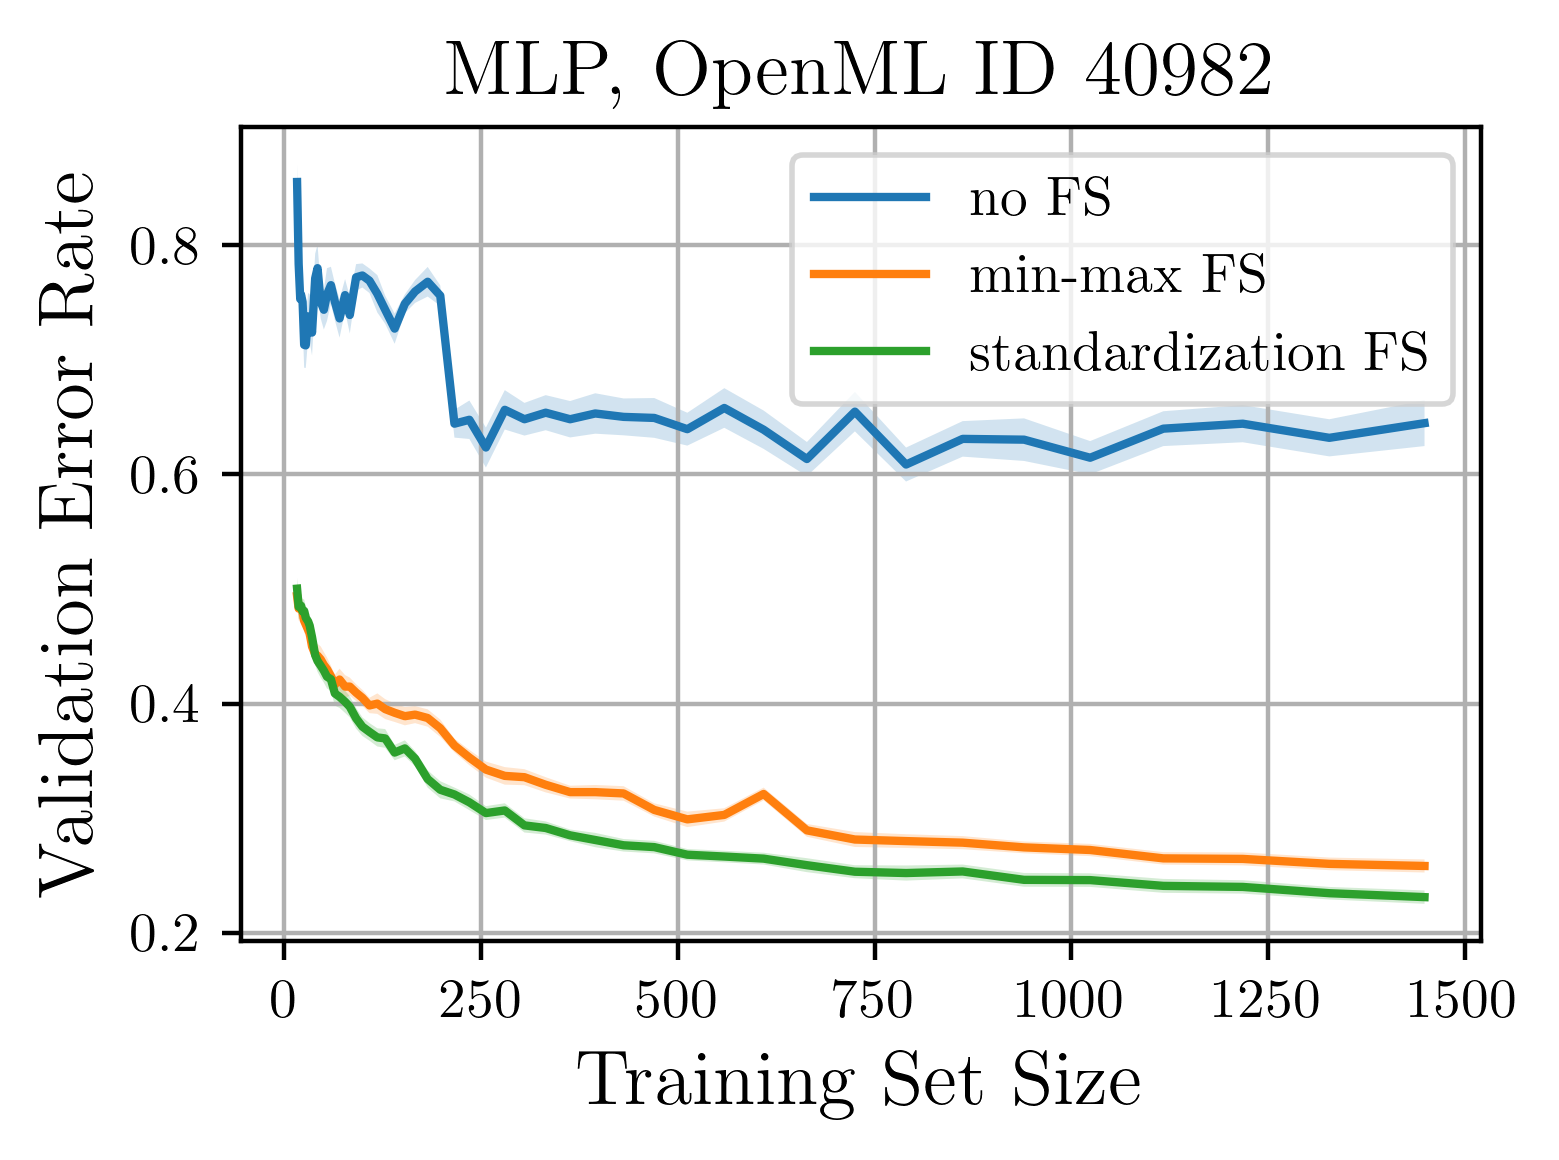

In [32]:
LEARNER, DATASET = 11, 66
# LEARNER, DATASET = 2, 59
# LEARNER, DATASET = 12, 57
# LEARNER, DATASET = 19, 35

mean_clean, se_clean = extract_mean_se(dataset_nofs, DATASET, LEARNER)
mean_clean_fs, se_clean_fs = extract_mean_se(dataset_minmaxfs, DATASET, LEARNER)
mean_clean_zfs, se_clean_zfs = extract_mean_se(dataset_standardfs, DATASET, LEARNER)

plt.figure(figsize=(4, 3), dpi=400)
plt.plot(anchor_list_denser, mean_clean, label='no FS')
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)
plt.plot(anchor_list_denser, mean_clean_fs, label='min-max FS')
plt.fill_between(anchor_list_denser, mean_clean_fs - se_clean_fs, mean_clean_fs + se_clean_fs, alpha=0.2)
plt.plot(anchor_list_denser, mean_clean_zfs, label='standardization FS')
plt.fill_between(anchor_list_denser, mean_clean_zfs - se_clean_zfs, mean_clean_zfs + se_clean_zfs, alpha=0.2)
plt.title(f'{learner_zoo[LEARNER]}, OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=14)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Validation Error Rate', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

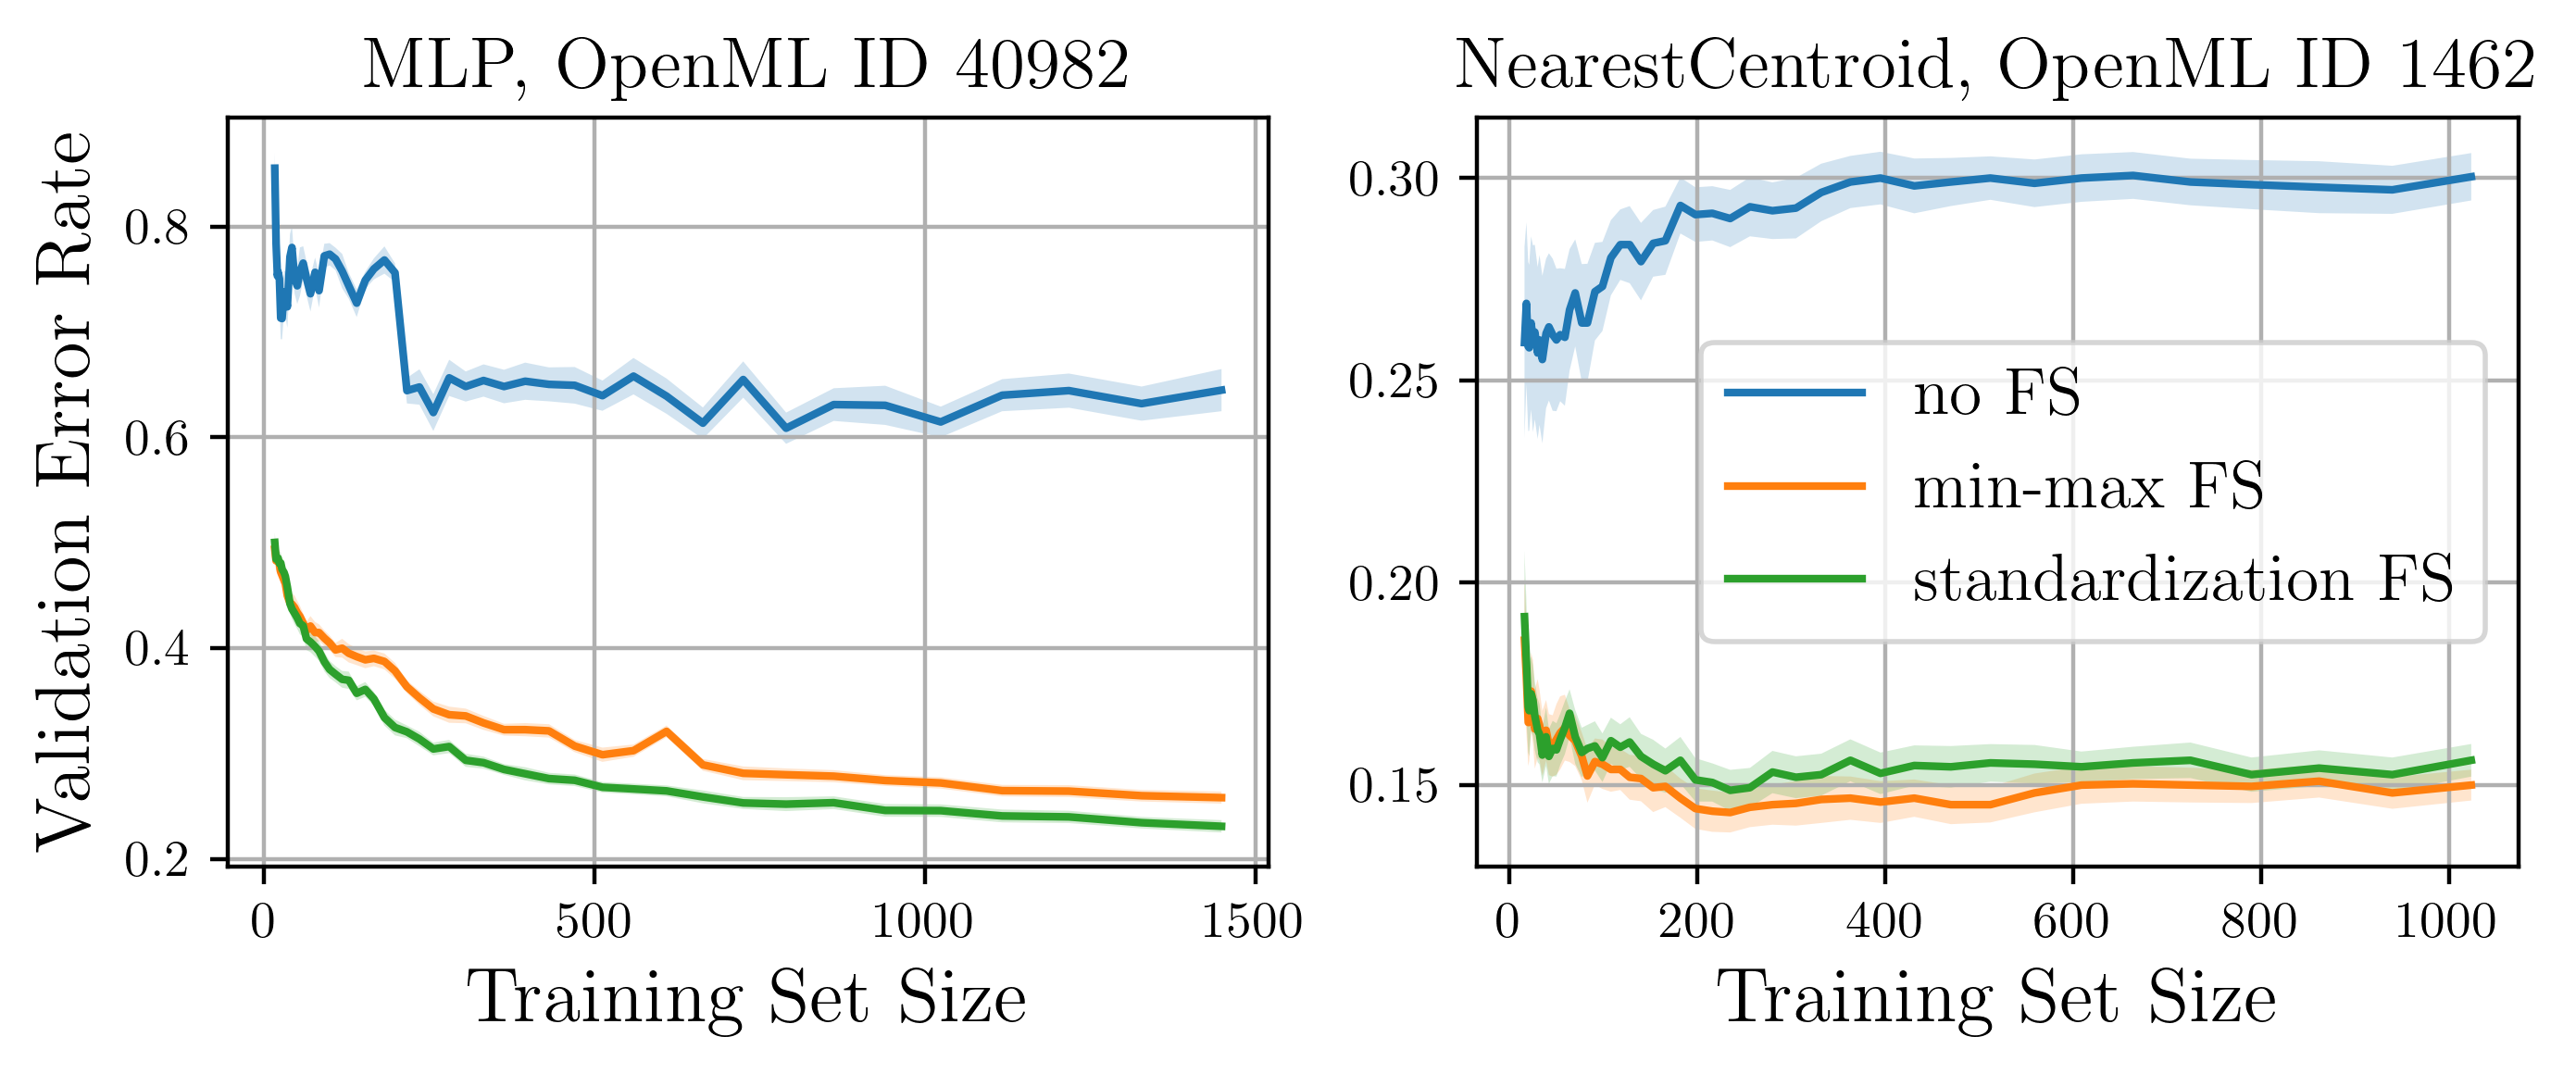

In [9]:
pairs = [(11, 66), (19, 35)]

fig, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=400)

for ax, (LEARNER, DATASET) in zip(axes, pairs):
    mean_clean, se_clean = extract_mean_se(dataset_nofs, DATASET, LEARNER)
    mean_clean_fs, se_clean_fs = extract_mean_se(dataset_minmaxfs, DATASET, LEARNER)
    mean_clean_zfs, se_clean_zfs = extract_mean_se(dataset_standardfs, DATASET, LEARNER)

    ax.plot(anchor_list_denser, mean_clean, label='no FS')
    ax.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)

    ax.plot(anchor_list_denser, mean_clean_fs, label='min-max FS')
    ax.fill_between(anchor_list_denser, mean_clean_fs - se_clean_fs, mean_clean_fs + se_clean_fs, alpha=0.2)

    ax.plot(anchor_list_denser, mean_clean_zfs, label='standardization FS')
    ax.fill_between(anchor_list_denser, mean_clean_zfs - se_clean_zfs, mean_clean_zfs + se_clean_zfs, alpha=0.2)

    ax.set_title(f'{learner_zoo[LEARNER]}, OpenML ID {dataset_ids_CC18[DATASET]}', fontsize=14)
    ax.set_xlabel('Training Set Size', fontsize=15)
    ax.grid()

axes[0].set_ylabel('Validation Error Rate', fontsize=15)
axes[1].legend(fontsize=13)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2) 
plt.show()


### MLP Phase Transitions

C:\Users\cyan1\AppData\Local\Temp\ipykernel_10756\2149425132.py:12: RuntimeWarning: Mean of empty slice
  mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
C:\Users\cyan1\AppData\Local\Temp\ipykernel_10756\2149425132.py:16: RuntimeWarning: Mean of empty slice
  mean_clean_fs = np.nanmean(lc_clean_fs[:, :, :], axis=(0, 1))
C:\Users\cyan1\AppData\Local\Temp\ipykernel_10756\2149425132.py:20: RuntimeWarning: Mean of empty slice
  mean_clean_zfs = np.nanmean(lc_clean_zfs[:, :, :], axis=(0, 1))


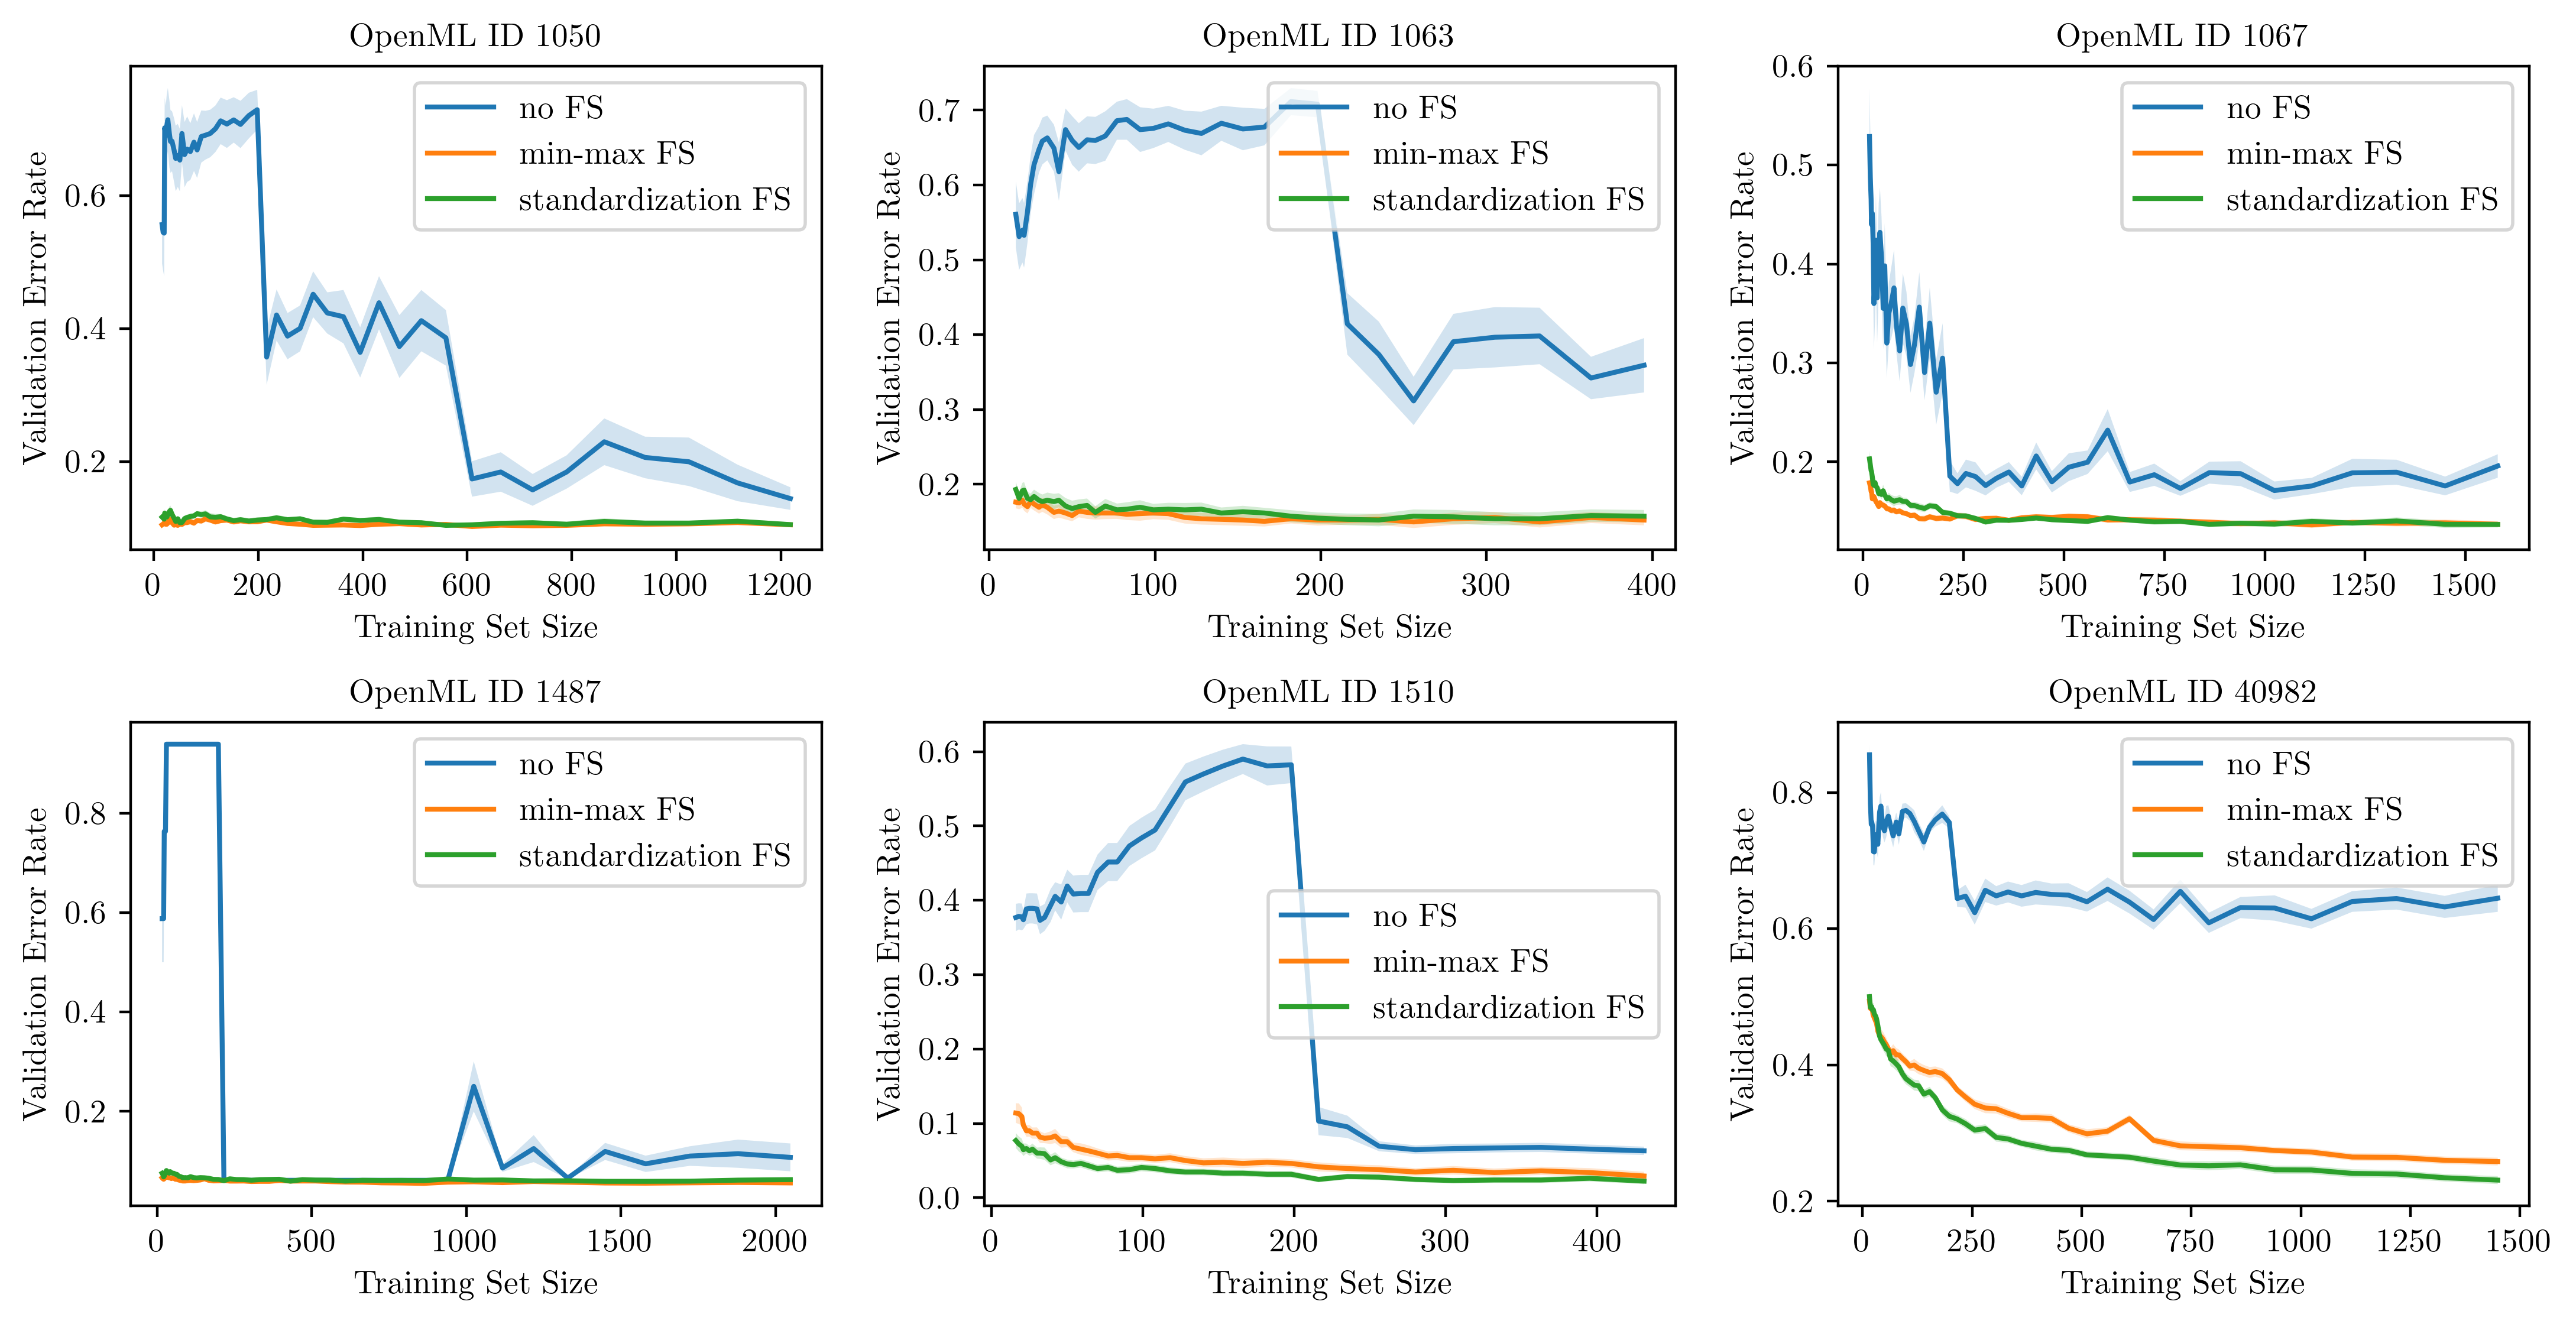

In [6]:
# transition
LEARNER = 11
DATASET = [29, 31, 32, 43, 48, 66]

fig, axs = plt.subplots(2, 3, figsize=(11, 6), dpi=400)
axs = axs.flatten()

for i, ds in enumerate(DATASET):
    ax = axs[i]
    
    lc_clean = dataset_nofs[ds, LEARNER, :, :, :, 1]
    mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
    se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

    lc_clean_fs = dataset_minmaxfs[ds, LEARNER, :, :, :, 1]
    mean_clean_fs = np.nanmean(lc_clean_fs[:, :, :], axis=(0, 1))
    se_clean_fs = np.nanstd(lc_clean_fs[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean_fs[:, :, :]), axis=(0, 1)))

    lc_clean_zfs = dataset_standardfs[ds, LEARNER, :, :, :, 1]
    mean_clean_zfs = np.nanmean(lc_clean_zfs[:, :, :], axis=(0, 1))
    se_clean_zfs = np.nanstd(lc_clean_zfs[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean_zfs[:, :, :]), axis=(0, 1)))

    ax.plot(anchor_list_denser, mean_clean, label='no FS')
    ax.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)
    ax.plot(anchor_list_denser, mean_clean_fs, label='min-max FS')
    ax.fill_between(anchor_list_denser, mean_clean_fs - se_clean_fs, mean_clean_fs + se_clean_fs, alpha=0.2)
    ax.plot(anchor_list_denser, mean_clean_zfs, label='standardization FS')
    ax.fill_between(anchor_list_denser, mean_clean_zfs - se_clean_zfs, mean_clean_zfs + se_clean_zfs, alpha=0.2)

    ax.set_title(f"OpenML ID {dataset_ids_CC18[ds]}", fontsize=10)
    ax.set_xlabel('Training Set Size', fontsize=10)
    ax.set_ylabel('Validation Error Rate', fontsize=10)
    ax.tick_params(labelsize=10)
    ax.legend(fontsize=10, loc='best') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

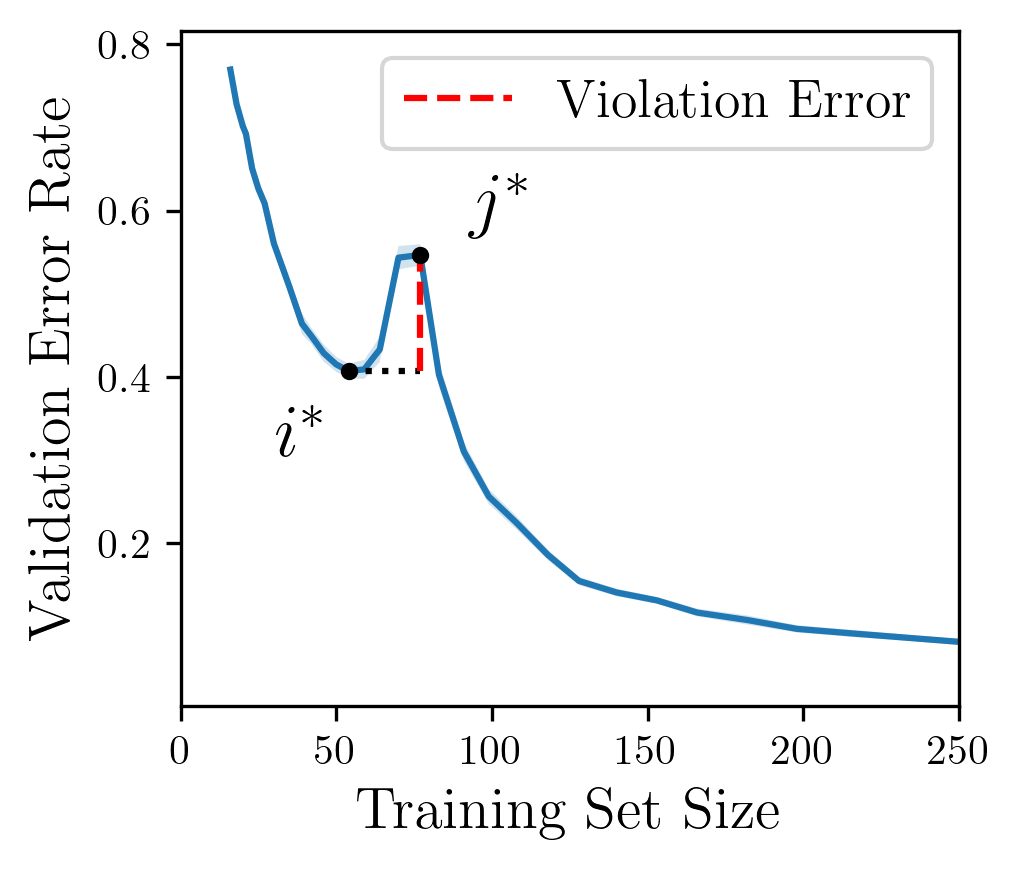

In [48]:
LEARNER, DATASET = 12, 6

lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

plt.figure(figsize=(3.5, 3), dpi=300)
plt.plot(anchor_list_denser, mean_clean)#, label="LCDB 1.1 noFS")
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)

pair_indices = [(i, j) for i in range(len(mean_clean) - 1) for j in range(i + 1, len(mean_clean))]

max_difference = 0 
i_index, j_index = None, None
for (i, j) in pair_indices:
    diff = mean_clean[j] - mean_clean[i]
    if diff > max_difference:
        max_difference = diff
        i_index, j_index = i, j

if i_index is not None and j_index is not None:
    x1, x2 = anchor_list_denser[i_index], anchor_list_denser[j_index]
    y1, y2 = mean_clean[i_index], mean_clean[j_index]

    # h* and j* 
    plt.plot([x1, x2], [y1, y1], linestyle='dotted', color = 'black', linewidth=1.5, zorder=4)
    # violation error
    plt.vlines(x2, ymin=y1, ymax=y2, colors='red', linestyles='--', linewidth=1.5, zorder=4, label = 'Violation Error')

    plt.scatter([x1, x2], [y1, y2], color='black', s=10, zorder=5)  
    
    plt.text(x1-15, y1 - 0.12, '$i^*$', fontsize=18, ha='center', va='bottom', color='black')  
    plt.text(x2+25, y2 + 0.02, '$j^*$', fontsize=18, ha='center', va='bottom', color='black')

plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Validation Error Rate', fontsize=14)
plt.xlim(0,250)
# plt.xscale('log')
plt.legend(fontsize=13)
plt.tight_layout()
# plt.savefig('1.png')
plt.show()


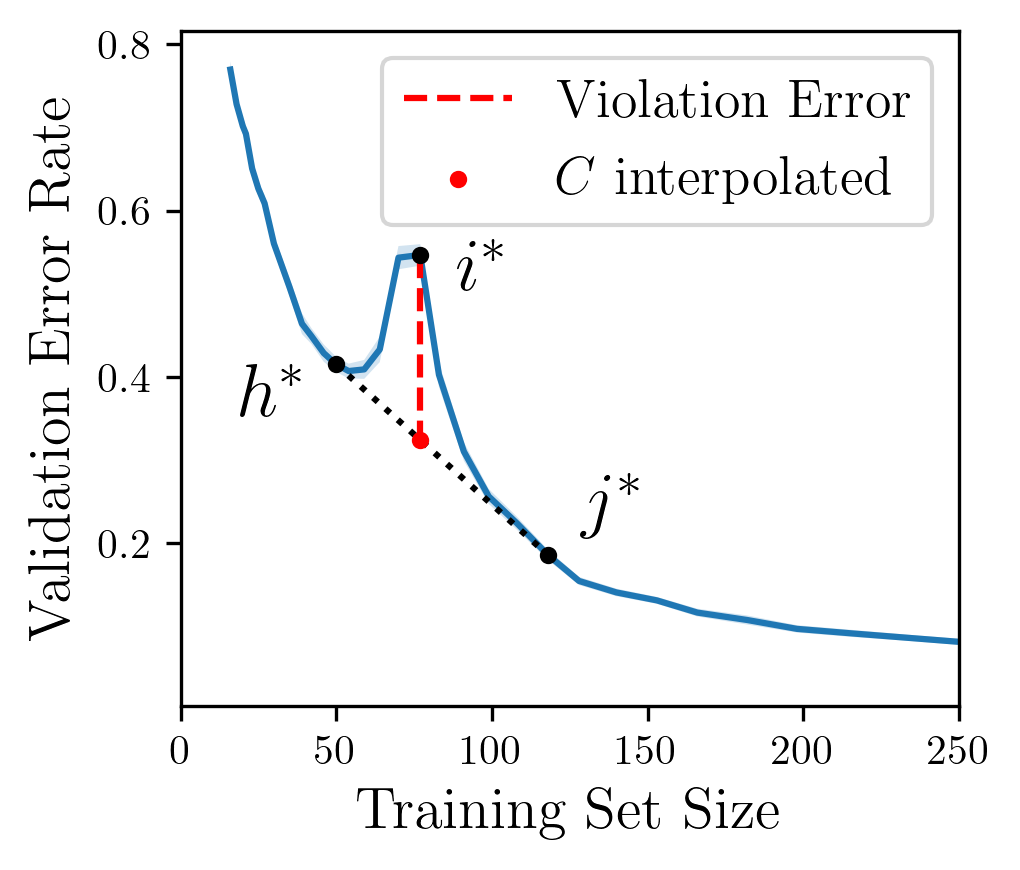

In [3]:
LEARNER, DATASET = 12, 6

lc_clean = dataset_nofs[DATASET, LEARNER, :, :, :, 1]
mean_clean = np.nanmean(lc_clean[:, :, :], axis=(0, 1))
se_clean = np.nanstd(lc_clean[:, :, :], axis=(0, 1), ddof=1) / np.sqrt(np.sum(~np.isnan(lc_clean[:, :, :]), axis=(0, 1)))

plt.figure(figsize=(3.5, 3), dpi=300)
plt.plot(anchor_list_denser, mean_clean)#, label="LCDB 1.1 noFS")
plt.fill_between(anchor_list_denser, mean_clean - se_clean, mean_clean + se_clean, alpha=0.2)

num_points = len(mean_clean)
triple_indices = [(h, i, j) for h in range(num_points - 2) 
                    for i in range(h + 1, num_points - 1) 
                    for j in range(i + 1, num_points)]

# find maximum convexity violation i
max_violation = 0 
h_index, i_index, j_index = None, None, None

# loop all (h, i, j)
for (h, i, j) in triple_indices:
    # mid point
    uneven_ratio_j = (anchor_list_denser[i] - anchor_list_denser[h]) / (anchor_list_denser[j] - anchor_list_denser[h]) 
    uneven_ratio_h = (anchor_list_denser[j] - anchor_list_denser[i]) / (anchor_list_denser[j] - anchor_list_denser[h])
    mid_point_hj = mean_clean[h] * uneven_ratio_h + mean_clean[j] * uneven_ratio_j 
    # diff
    violation = mean_clean[i] - mid_point_hj

    if violation > max_violation:
        max_violation = violation
        h_index, i_index, j_index = h, i, j

if i_index is not None and j_index is not None:
    x1, x2 = anchor_list_denser[h_index], anchor_list_denser[j_index]
    y1, y2 = mean_clean[h_index], mean_clean[j_index]
    x_, y_ = anchor_list_denser[i_index], mean_clean[i_index]

    # h* and j* 
    plt.plot([x1, x2], [y1, y2], linestyle='dotted', color = 'black',linewidth=1.5, zorder=4)
    # violation error
    plt.vlines(x_, ymin=y_, ymax=(y1*(x2-x_)/(x2-x1)+y2*(x_-x1)/(x2-x1)), colors='red', linestyles='--', linewidth=1.5, zorder=4, label = 'Violation Error')

    plt.scatter([x1, x2], [y1, y2], color='black', s=10, zorder=5)  
    plt.scatter(x_, y_, color='black', s=10, zorder=5)  
    plt.scatter(x_, (y1*(x2-x_)/(x2-x1)+y2*(x_-x1)/(x2-x1)), color='red', s=10, zorder=5, label = '$C$ interpolated') 

    plt.text(x1-20, y1-0.08, '$h^*$', fontsize=18, ha='center', va='bottom', color='black')  
    plt.text(x2+20, y2 + 0.02, '$j^*$', fontsize=18, ha='center', va='bottom', color='black')
    plt.text(x_+20, y_ -0.06, '$i^*$', fontsize=18, ha='center', va='bottom', color='black')

plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Validation Error Rate', fontsize=14)
plt.xlim(0,250)
# plt.xscale('log')
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()
